<a href="https://colab.research.google.com/github/fedhere/MLTSA_FBianco/blob/master/GP/GPexercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
SNe = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/GP/data/SuperNovaeSCs.csv", sep=" ", 
            names=["SN", "band", "mjd", "mag", "err", "survey"])
SNe.head()
SNe.groupby(["SN", "band"]).count()

mjd  mag  err  survey
SN     band                       
2001ej B       8    8    8       8
       I       8    8    8       8
       R       8    8    8       8
       V       7    7    7       7
2001gd B       2    2    2       2
...          ...  ...  ...     ...
2009jf Ks     17   17   17      17
       V      29   29   29      29
       i'     30   30   30      30
       r'     30   30   30      30
       u'      7    7    7       7

[335 rows x 4 columns]

In [0]:
# convert from magnitude to flux
# because magnitude is an articaft which is useful in astronomuy, 
# but you do not have to worry about that
SNe["F"] = 10**((24 - SNe["mag"] ) / 2.5)
SNe["Ferr"] = SNe["err"] * SNe["F"] / 2.5 * np.log(10)       


/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


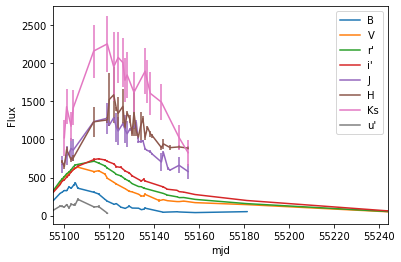

In [18]:
ax = pl.figure().add_subplot(111)
for b in SNe["band"].unique():
    if b in SNe[SNe["SN"] == "2009iz"].band.values:
                
        SNe[(SNe["SN"] == "2009iz") * (SNe["band"] == b)].plot(x="mjd",
                                    y="F", yerr="Ferr", ax=ax, label=b)
pl.ylabel("Flux");

Figure 1: this is a lightcutve (the time series of flux) of a Supermova (an exploding start) - the flux is measures in different wavelengths and at different times in each wavelenght. 

In [0]:
# these are the "effective wavelengths of each filter: 
# you can assume a time series in this filter corresponds to this wavelength
# e.g. u -> 365 nanometers
wavelengths = {"u'":365 ,
"g'":477,
"r'":623,
"i'":763,
"z":913,
"B":445,
"V":551,
"R":658,
"I":806,
"J":1220,
"H":1630,
"Ks":2190}

# example working with 1 SN - SN 2009iz
the name of the SN reflects the discovery time: this SN was the 243th discovered in 2009

In [0]:
df = SNe[(SNe["SN"] == "2009iz")]

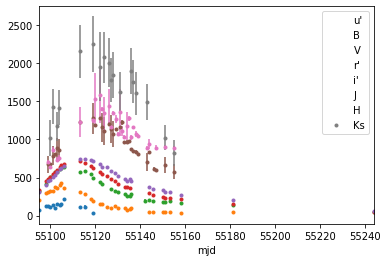

In [21]:
ax = pl.figure().add_subplot(111)
for b in df["band"].unique():
    if b in df.band.values:
        
        df[(df["band"] == b)].plot(x="mjd", y="F", yerr="Ferr", ax=ax, label=b, fmt='.')

# Goals: you have 2 goals: 

## fit the flux in each band separately with a Gaussian Process, This will allow you to find the peak in each band and align the SN by their peak. 
## you can also fit the SN in both time and wavelength with a 2D gaussian process. This would allow you to extract info from bands that are not observed, e.g. the Z band with an effective wavelength of 966 nm.

More importantly, this would allow you to correct the effect of redshift: because the Universe is expanding the emission, which is a wave, is stretched by Doppler effect. Like an ambulance syrene sounds lower peach, longer wavelength, when it is moving away from you, everything in the Universe is moving away from everyghing else, so things appear redder than they are, and the redder the farther away they are. This redshift correction is super important to compare what happens in the Universe near us (which we observe at the current time) and the Universe far away (which we observe as it was at a much younger age due to the finite speed of light) and constrain the evolution of the Universe . 



# task one, fit each SN lightcurve for each band with Gaussian Processes. 
## 1- Fit a GP to each SN to each lightcurve
 
## 2- Find the peak brightness in each band for each supernova lightcurve. 
 
## 3- For each supernova save an array of deltatimes DTs: the time difference in each band compared to r-band to reach maximum light. 
 
## 4- Put all those DTs together : for each band you will have N values where N is the number of SN with photometry in that band (not all SN have all the bands). Make a scatter plot with 8 categories on the x axis (the photometric band: 'u', 'B', 'g', 'r', 'i','H', 'J', 'K') and the corresponding DTs on the y axis
 
## 5- Convert the categorical x axis to a numerical value using the disctionary named *wavelengths* I created above
 
## 6- Fit a simple quadratic  (line, second deg polynomial, your choice): to the wavelength-DT values.  What is the estimate of the delay with respect to peak time in g as a function of wavelength? Can it be reliably modeled?
 
 

My kernel is Matern32 and Constant You can use any other kernels you think is appropriate. 
Be careful about the evolution of the time series, which is typically faster early on and slower later. 


In [0]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel, ExpSineSquared
#GaussianProcessRegressor?

In [30]:
!pip install george
import george

In [0]:
from george.kernels import Matern32Kernel, ConstantKernel#, WhiteKernel


In [43]:
df = SNe[(SNe["SN"] == "2009iz")]
df[df.band=="r'"]

,SN,band,mjd,mag,err,survey,F,Ferr
6136,2009iz,r',55095.42950,17.696,0.025,CfA4_KEP2,332.353304,7.652718
6137,2009iz,r',55098.33472,17.367,0.022,CfA4_KEP2,449.987034,9.117974
6138,2009iz,r',55099.27444,17.297,0.020,CfA4_KEP2,479.954425,8.841087
6139,2009iz,r',55100.28641,17.226,0.019,CfA4_KEP2,512.389239,8.966631
6140,2009iz,r',55101.28179,17.150,0.019,CfA4_KEP2,549.540874,9.616771
6141,2009iz,r',55102.28168,17.113,0.022,CfA4_KEP2,568.591025,11.521217
6142,2009iz,r',55103.37371,17.045,0.021,CfA4_KEP2,605.340875,11.708331
6143,2009iz,r',55104.35864,16.977,0.018,CfA4_KEP2,644.465985,10.684352
6144,2009iz,r',55105.20483,16.943,0.021,CfA4_KEP2,664.966857,12.861599
6145,2009iz,r',55106.24844,16.931,0.019,CfA4_KEP2,672.357107,11.766012


In [0]:
kernel = ConstantKernel(5) * Matern32Kernel(5)# + WhiteKernel(0.1, ndim=2)
gp = george.GP(kernel)
gp.compute(df[df.band=="r'"].mjd, df[df.band=="r'"].Ferr)

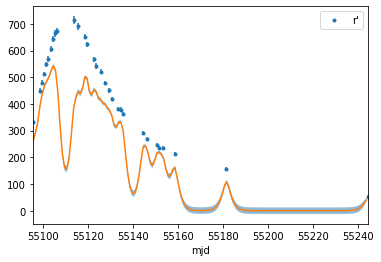

In [45]:
b = "r'"
y = df[df.band==b].F.values
x_pred = np.arange(df[df.band==b].mjd.iloc[0], 
                   df[df.band==b].mjd.iloc[-1])
x_pred = np.arange(df[df.band==b].mjd.iloc[0], 
                   df[df.band==b].mjd.iloc[-1])
f, sig = gp.predict(y, x_pred, return_var=True)
ax = pl.figure().add_subplot(111)
df[(df["band"] == b)].plot(x="mjd", y="F", yerr="Ferr", ax=ax, label=b, fmt='.')

pl.plot(x_pred, f)
pl.fill_between(x_pred, f - np.sqrt(sig), f + np.sqrt(sig), alpha=0.5);


## poor fit, but I did not optimize the parameters (no learning yet)

In [46]:
from scipy.optimize import minimize
def neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.log_likelihood(y)

def grad_neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(y)

result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
print(result)
gp.set_parameter_vector(result.x)
print("\nFinal ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))


      fun: 141.90569392114855
 hess_inv: array([[0.76848859, 0.571581  ],
       [0.571581  , 0.51132617]])
      jac: array([ 1.62225400e-06, -3.49192328e-06])
  message: 'Optimization terminated successfully.'
     nfev: 29
      nit: 23
     njev: 29
   status: 0
  success: True
        x: array([11.70056389,  7.68937556])

Final ln-likelihood: -141.91


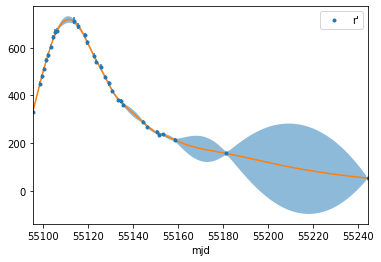

In [47]:
f, sig = gp.predict(y, x_pred, return_var=True)
ax = pl.figure().add_subplot(111)
df[(df["band"] == b)].plot(x="mjd", y="F", yerr="Ferr", ax=ax, label=b, fmt='.')

pl.plot(x_pred, f)
pl.fill_between(x_pred, f - np.sqrt(sig), f + np.sqrt(sig), alpha=0.5);

## much better! - now I can get the peak

In [48]:
rmax_index = np.where(f == f.max())[0][0]
rmaxs = {} 
rmaxs["SN2009iz"] = x_pred[rmax_index]

print("r peak is reached at MJD {:.1f} where the maximum is {:.1f} +/- {:.1f} (in some not specified units)".format(
      rmaxs["SN2009iz"], f[rmax_index], sig[rmax_index]))


r peak is reached at MJD 55111.4 where the maximum is 719.2 +/- 181.6 (in some not specified units)


In [49]:
peaks = pd.DataFrame.from_dict(wavelengths, orient="index").rename({0:"wavelength"}, axis=1)
peaks

,wavelength
u',365
g',477
r',623
i',763
z,913
B,445
V,551
R,658
I,806
J,1220


band u' peak is reached at MJD 55107.4 where the maximum is 176.7 +/- 338.4 (in some not specified units)
band r' peak is reached at MJD 55111.4 where the maximum is 719.2 +/- 181.6 (in some not specified units)
band i' peak is reached at MJD 55114.4 where the maximum is 742.4 +/- 91.6 (in some not specified units)
band B peak is reached at MJD 55105.4 where the maximum is 386.7 +/- 44.6 (in some not specified units)
band V peak is reached at MJD 55107.4 where the maximum is 636.5 +/- 132.1 (in some not specified units)
band J peak is reached at MJD 55122.4 where the maximum is 1287.1 +/- 250.9 (in some not specified units)
band H peak is reached at MJD 55122.4 where the maximum is 1440.9 +/- 12985.3 (in some not specified units)
band Ks peak is reached at MJD 55121.4 where the maximum is 1976.1 +/- 19663.0 (in some not specified units)


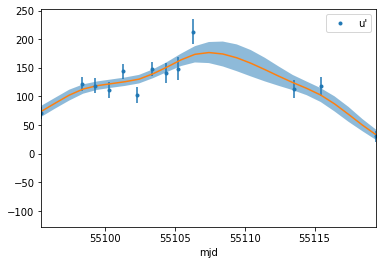

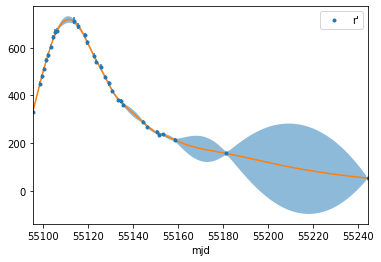

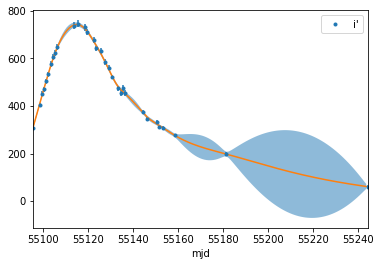

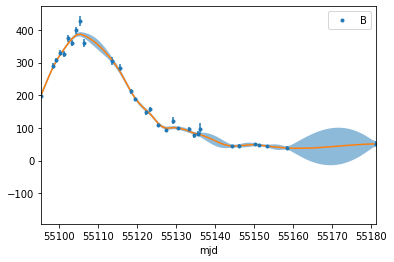

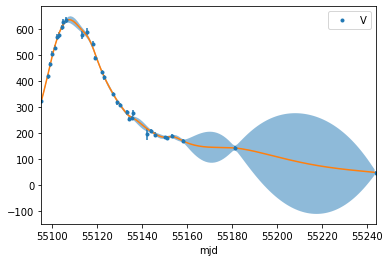

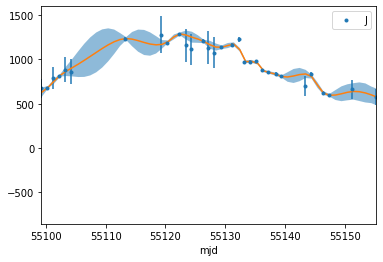

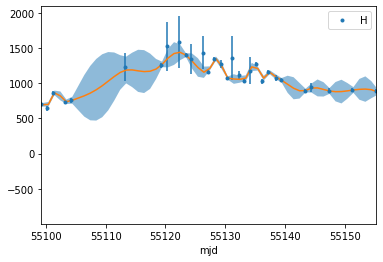

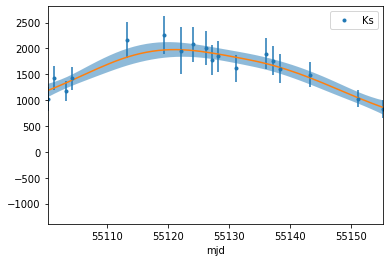

In [51]:
SNpeaks = np.zeros(len(wavelengths.keys())) * np.nan

for i,b in enumerate(wavelengths.keys()):
    if b in df.band.values:
        gp = george.GP(kernel)
        gp.compute(df[df.band==b].mjd, df[df.band==b].Ferr)
        y = df[df.band==b].F.values
        result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
        gp.set_parameter_vector(result.x)
        f, sig = gp.predict(y, x_pred, return_var=True)
        ax = pl.figure().add_subplot(111)
        df[(df["band"] == b)].plot(x="mjd", y="F", yerr="Ferr", ax=ax, label=b, fmt='.')

        pl.plot(x_pred, f)
        pl.fill_between(x_pred, f - np.sqrt(sig), f + np.sqrt(sig), alpha=0.5)
        rmax_index = np.where(f == f.max())[0][0]
        rmax_index
        SNpeaks[i] = x_pred[rmax_index] - rmaxs["SN2009iz"]

        print("band {:} peak is reached at MJD {:.1f} where the maximum is {:.1f} +/- {:.1f} (in some not specified units)".format(
          b, x_pred[rmax_index], f[rmax_index], sig[rmax_index]))
peaks["2009iz"] =  SNpeaks     



In [52]:
peaks

,wavelength,2009iz
u',365,-4.0
g',477,NaN
r',623,0.0
i',763,3.0
z,913,NaN
B,445,-6.0
V,551,-4.0
R,658,NaN
I,806,NaN
J,1220,11.0


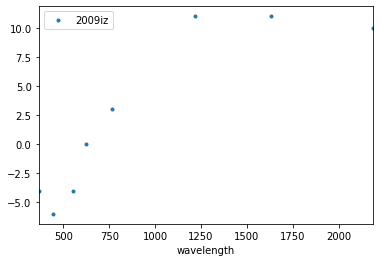

In [53]:
peaks.plot(x="wavelength", y="2009iz", style='.')

Fig 3a: the time of peak with respect to r band by wavelength

In [54]:
import statsmodels as sm
import statsmodels.formula.api as smf
peakdt = smf.ols(formula = "y ~ pow(wavelength, 3) + pow(wavelength, 1) + wavelength", data=peaks.rename({"2009iz":"y"}, axis=1)).fit()
peakdt.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     51.30
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           0.000466
Time:                        19:09:08   Log-Likelihood:                -14.345
No. Observations:                   8   AIC:                             34.69
Df Residuals:                       5   BIC:                             34.93
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -14.4574      2.099     -6.888      0.001     -19.853      -9.062
pow(wavelength, 3) -2.582e-09   5.75e-10     -4.487      0.006   -4.06e-09    -1.1e-09
pow(wavelength, 1)     0.0117      0.002      7.233      0.001       0.008       0.016
wavelength             0.0117      0.002      7.233      0.001       0.008       0.016
==============================================================================
Omnibus:                        1.898   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                0.753
Skew:                          -0.138   Prob(JB):                        0.686
Kurtosis:                       1.523   Cond. No.                     2.87e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.62e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

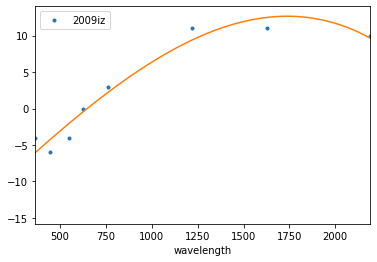

In [57]:
peaks.plot(x="wavelength", y="2009iz", style='.')
pl.plot(peakdt.predict(pd.DataFrame.from_dict({"wavelength": np.arange(0,2500)})));

Fig 3: For this single supernova the time to peak can be predicted to R^2 95% by a 3rd degree polynomial fit. 

It will be much more interesting to do it with the data for all ~60 supernovae at once.

# Task 2: fit 2D GPs to wavelength and time at once for each SN

I did this by going to log space in wavelength domain since the wavelength of the bands are far from evenly spaced.
Here I am woring on one SN at a time. I still have SN 2009iz in my dataframe

In [58]:
df["wavelength"] = df["band"].map(wavelengths)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# to fit a surface I need to define a surface: I need all pairs of time stamps and band available in the dataframe

t = df.groupby(['mjd', 'wavelength']).first()[["F", "Ferr"]].index.get_level_values(0).values - rmaxs["SN2009iz"]
w = df.groupby(['mjd', 'wavelength']).first()[["F", "Ferr"]].index.get_level_values(1).values
y = df.groupby(['mjd', 'wavelength']).first()["F"].values
yerr = df.groupby(['mjd', 'wavelength']).first()["Ferr"].values

In [60]:
x = np.array(list(zip(t, np.log10(w))))
x[:,0].min(), x[:,0].max(), x[:,1].min(), x[:,1].max()

(-16.00231000000349,
 132.74521000000095,
 2.5622928644564746,
 3.3404441148401185)

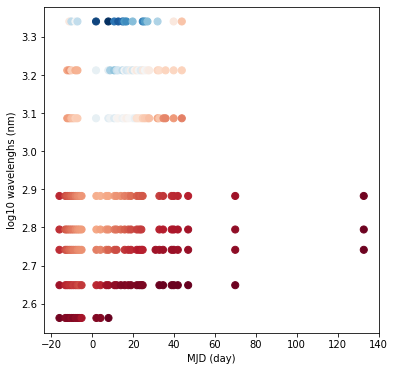

In [61]:
f, ax = plt.subplots(1, figsize=(6,6))

style = dict(cmap='RdBu')
ax.scatter(x[:, 0], x[:, 1], c=y, s=50, **style)
ax.set_xlabel("MJD (day)")
ax.set_ylabel("log10 wavelenghs (nm)");

In [62]:
kernel = ConstantKernel(5, ndim=2) * Matern32Kernel(5, ndim=2)
gp = george.GP(kernel)
gp.compute(x)
#gp.compute(np.array([t,t].T), 0)

test_pts = np.array(np.meshgrid(np.linspace(x.min(), x.max(), num=100),
                                np.linspace(np.log10(444), 
                            np.log10(2200), num=100))).reshape(2, -1).T

mu, cov = gp.predict(y, test_pts)

test_pts

array([[-16.00231   ,   2.64738297],
       [-14.4998098 ,   2.64738297],
       [-12.9973096 ,   2.64738297],
       ...,
       [129.7402096 ,   3.34242268],
       [131.2427098 ,   3.34242268],
       [132.74521   ,   3.34242268]])

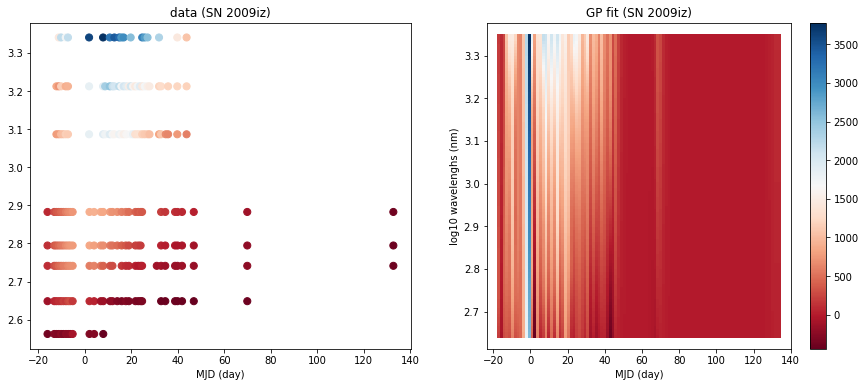

In [63]:
f, axes = plt.subplots(1, 2, figsize=(15,6))

style = dict(cmap='RdBu')
axes[0].scatter(x[:, 0], x[:, 1], c=y, s=50, **style)
m = axes[1].scatter(test_pts[:, 0], test_pts[:, 1], c=mu, s=50, 
                marker='s', edgecolor='none', **style)
axes[0].set_xlabel("MJD (day)")
axes[1].set_ylabel("log10 wavelenghs (nm)")
axes[0].set_title("data (SN 2009iz)")
axes[1].set_xlabel("MJD (day)")
axes[1].set_ylabel("log10 wavelenghs (nm)")
axes[1].set_title("GP fit (SN 2009iz)");
pl.colorbar(m)


In [0]:
indxw = np.where(np.abs(test_pts[:, 1] - np.log10(wavelengths["z"]) == 
                np.min(np.abs(test_pts[:, 1] - np.log10(wavelengths["z"])))))

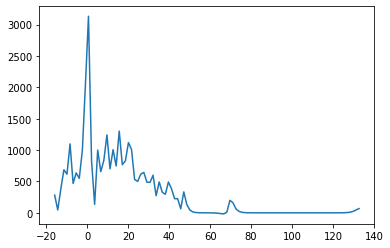

In [65]:
pl.plot(test_pts[:, 0][indxw], mu[indxw])


In [0]:
# not so good..... I will check what is going on soon 
